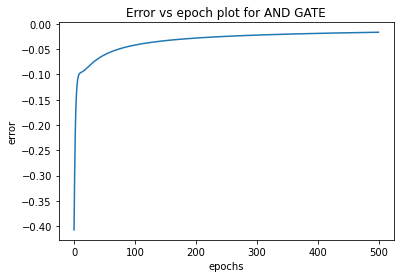

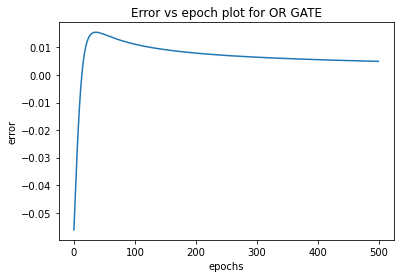

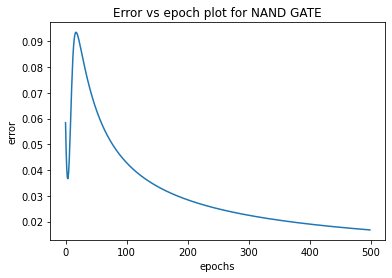

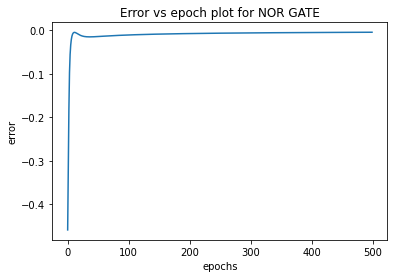

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1 - x)

X_AND = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
X_OR= np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
X_NAND = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
X_NOR = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])

Y_AND = np.array([ [0], [0],[0], [1]])
Y_OR = np.array([ [0], [1],[1], [1]])
Y_NAND = np.array([ [1], [1],[1], [0]])
Y_NOR= np.array([ [1], [0],[0], [0]])


epochs = 500
inputLayerNeurons=2
outputLayerNeurons =1

#Random weights and bias initialization
W_AND = np.random.uniform(size=(inputLayerNeurons,outputLayerNeurons))
W_OR = np.random.uniform(size=(inputLayerNeurons,outputLayerNeurons))
W_NAND= np.random.uniform(size=(inputLayerNeurons,outputLayerNeurons))
W_NOR = np.random.uniform(size=(inputLayerNeurons,outputLayerNeurons))

B_AND =np.random.uniform(size=(1,outputLayerNeurons))
B_OR =np.random.uniform(size=(1,outputLayerNeurons))
B_NAND =np.random.uniform(size=(1,outputLayerNeurons))
B_NOR =np.random.uniform(size=(1,outputLayerNeurons))

E_AND=[]
E_OR=[]
E_NAND=[]
E_NOR=[]

for i in range(1,501):
    #Forward propagation
    a1_AND=X_AND             #(4,2)
    a1_OR=X_OR 
    a1_NAND=X_NAND    
    a1_NOR=X_NOR    
    
    z2_AND=np.dot(a1_AND,W_AND)+B_AND #(4,1)
    z2_OR=np.dot(a1_OR,W_OR)+B_OR 
    z2_NAND=np.dot(a1_NAND,W_NAND)+B_NAND
    z2_NOR=np.dot(a1_NOR,W_NOR)+B_NOR
    
    a2_AND=sigmoid(z2_AND)       #(4,1)
    a2_OR=sigmoid(z2_OR)
    a2_NAND=sigmoid(z2_NAND)
    a2_NOR=sigmoid(z2_NOR)
    
   # Backward propagation
   #Updateweightsandbias
    
    
    error_AND=(Y_AND-a2_AND)                       #(4,1)
    error_OR=(Y_OR-a2_OR)
    error_NAND=(Y_NAND-a2_NAND)
    error_NOR=(Y_NOR-a2_NOR)
    
    delta_output_AND=error_AND*sigmoid_der(a2_AND) #(4,1)
    delta_output_OR=error_OR*sigmoid_der(a2_OR)
    delta_output_NAND=error_NAND*sigmoid_der(a2_NAND)
    delta_output_NOR=error_NOR*sigmoid_der(a2_NOR)
    
    update_AND=np.dot(a1_AND.T,delta_output_AND)      #(2,1)
    update_OR=np.dot(a1_OR.T,delta_output_OR) 
    update_NAND=np.dot(a1_NAND.T,delta_output_NAND) 
    update_NOR=np.dot(a1_NOR.T,delta_output_NOR) 
    
    W_AND=W_AND+update_AND                        #(2,1)
    W_OR=W_OR+update_OR  
    W_NAND=W_NAND+update_NAND  
    W_NOR=W_NOR+update_NOR  
    
    B_AND=B_AND+sum(delta_output_AND)#(1,1)
    B_OR=B_OR+sum(delta_output_OR)
    B_NAND=B_NAND+sum(delta_output_NAND)
    B_NOR=B_NOR+sum(delta_output_NOR)
    
    E_AND.append(error_AND.mean(0))
    E_OR.append(error_OR.mean(0))
    E_NAND.append(error_NAND.mean(0))
    E_NOR.append(error_NOR.mean(0))
    
plt.title("Error vs epoch plot for AND GATE")
plt.plot(range(500), E_AND)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

plt.title("Error vs epoch plot for OR GATE")
plt.plot(range(500), E_OR)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()


plt.title("Error vs epoch plot for NAND GATE")
plt.plot(range(500), E_NAND)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

plt.title("Error vs epoch plot for NOR GATE")
plt.plot(range(500), E_NOR)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()
    
